Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import time

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Import Jimmy Butler's career record dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/DSAI/Class_Project_Group9/Dataset")
jb = pd.read_csv("Butler_data.csv")
jb.head()

Mounted at /content/drive


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


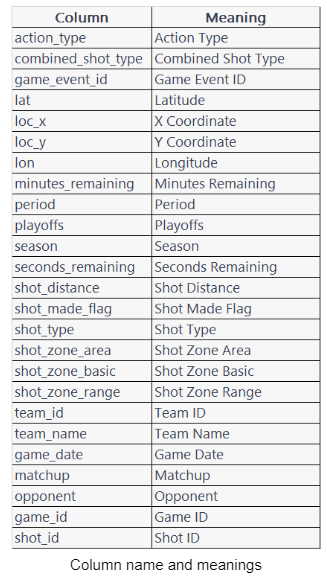




Cleaning and Pre-processing

In [ ]:
jb.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


A total of 30,697 data before processing

In [ ]:
jb.shape

(30697, 25)

In [ ]:
jb = jb[pd.notnull(jb['shot_made_flag'])]
jb.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [ ]:
jb.shape

(25697, 25)

There are 25697 data remain after cleaning and pre-processing

In [ ]:
jb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

The dataset has a total 25 features

EDA

Text(0.5, 1.0, 'JB Career Shot Statistics by Type')

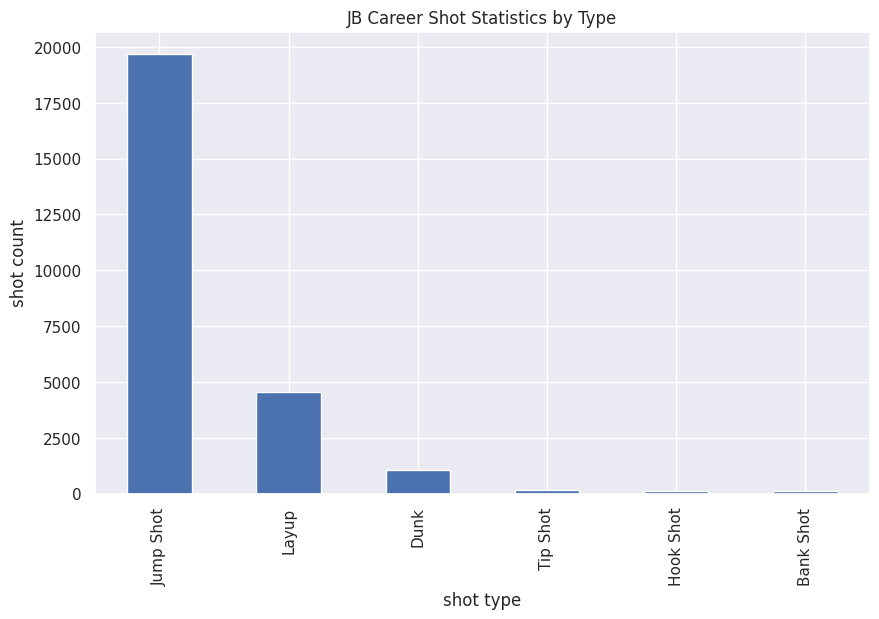

In [ ]:
plt.rcParams['axes.unicode_minus']=False
#View the distribution of Butler's shot types
plt.figure(figsize = (10,6))
jb['combined_shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('shot type');plt.ylabel('shot count');plt.title('JB Career Shot Statistics by Type')

From the bar chart above, it can be seen that Butler's best move is the jump shot, followed by the layup

(array([0, 1]), [Text(0, 0, '2PT Field Goal'), Text(1, 0, '3PT Field Goal')])

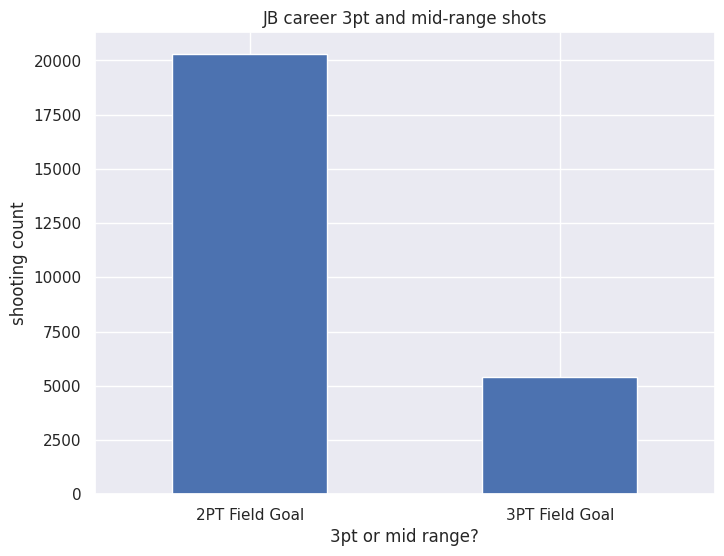

In [ ]:
#Check Jimmy Butler's career field golas
plt.figure(figsize = (8,6))
jb['shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('3pt or mid range?');plt.ylabel('shooting count');plt.title('JB career 3pt and mid-range shots')
plt.xticks(rotation = 0)

He is good at mid-range jump shots

Text(0.5, 1.0, 'JB Shot Range Distribution')

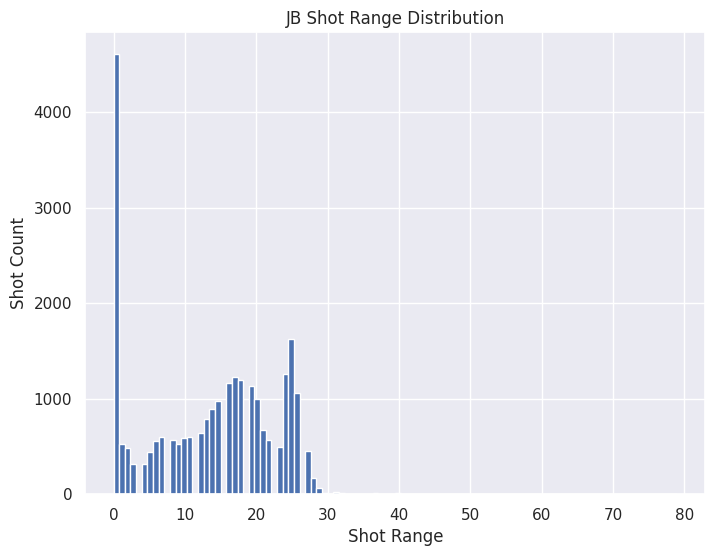

In [ ]:
#Check Jimmy Butler's shooting range
plt.figure(figsize = (8,6))
jb['shot_distance'].hist(bins = 100)
plt.xlabel('Shot Range');plt.ylabel('Shot Count');plt.title('JB Shot Range Distribution')

 We can see that Jimmy Butler's shots are concentrated between 10 feet under the basket and the free throw line

Text(0.5, 1.0, 'JB Shot Range Distribution')

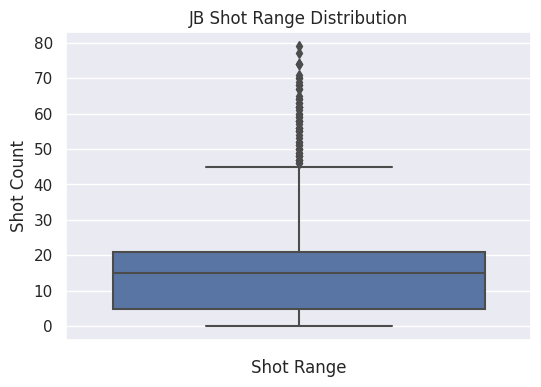

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(data = jb,y = 'shot_distance')
plt.xlabel('Shot Range');plt.ylabel('Shot Count');plt.title('JB Shot Range Distribution')

Through the boxplot, we can more intuitively see that JB likes to shoot under the basket.

Text(0.5, 1.0, 'shot_zone_range')

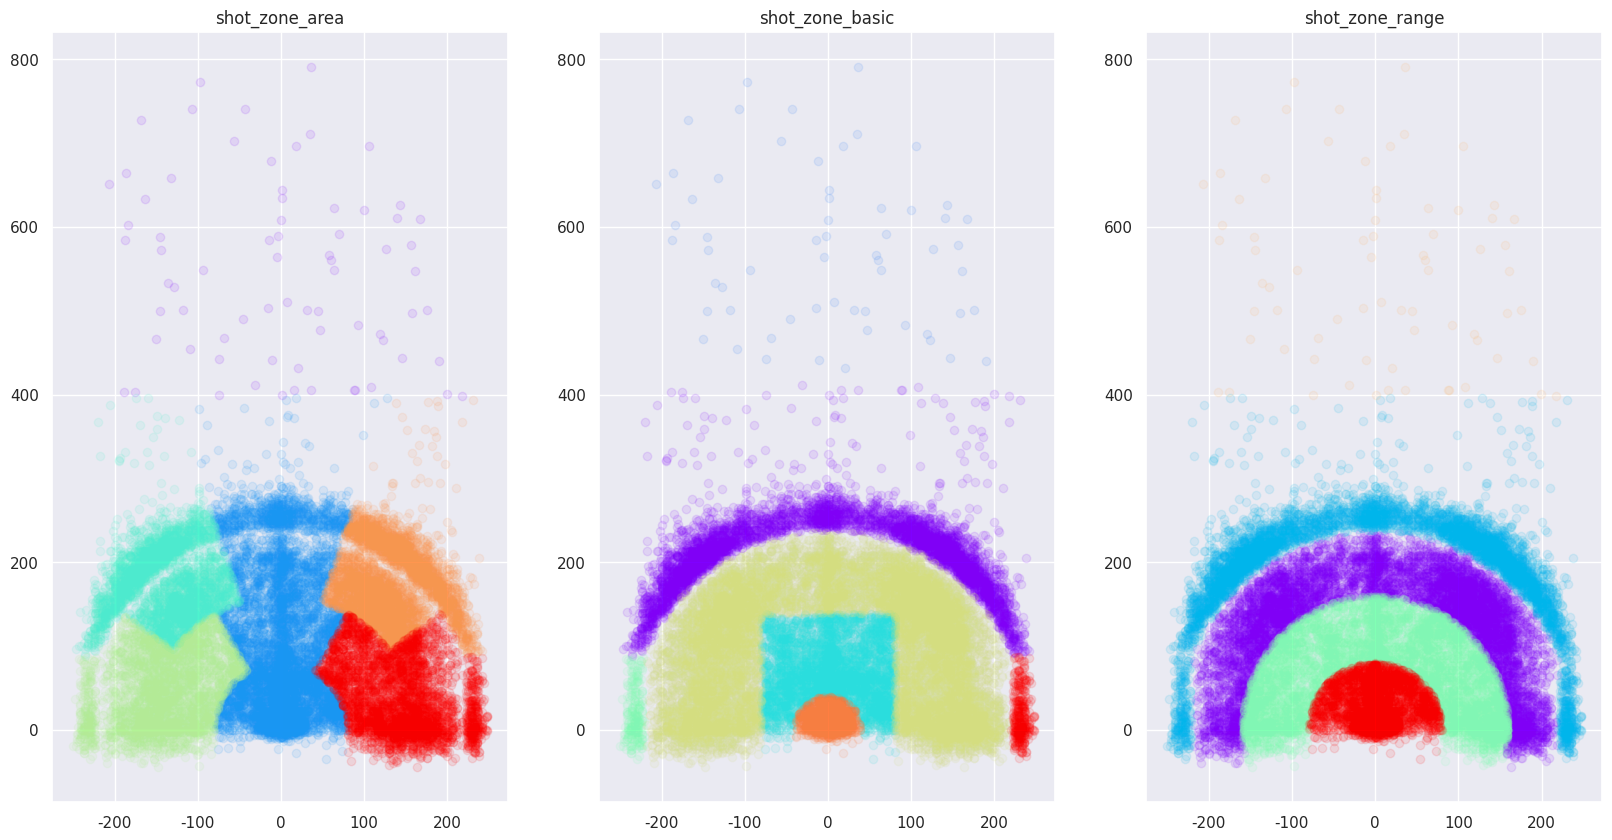

In [ ]:
#Visualize Jimme Butler's shot area, divided according to different criteria
import matplotlib.cm as cm
plt.figure(figsize  = (20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = jb.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color = c,alpha = alpha)

plt.subplot(1,3,1)
scatter_plot_by_category(jb['shot_zone_area'])

plt.title('shot_zone_area')

plt.subplot(1,3,2)
scatter_plot_by_category(jb['shot_zone_basic'])
plt.title('shot_zone_basic')

plt.subplot(1,3,3)
scatter_plot_by_category(jb['shot_zone_range'])
plt.title('shot_zone_range')

* shot_zone_area: left wing, right wing, front court, mid court, back court
* shot_zone_basic: Wing, top of the circle, paint, restricted zone
* shot_zone_range: Less than 8 feet, 8-16 feet, 16-24 feet, more than 24 feet, etc  





In [ ]:
#Percentage of shots from each range
jb['shot_distance'].describe()

count    25697.000000
mean        13.457096
std          9.388725
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

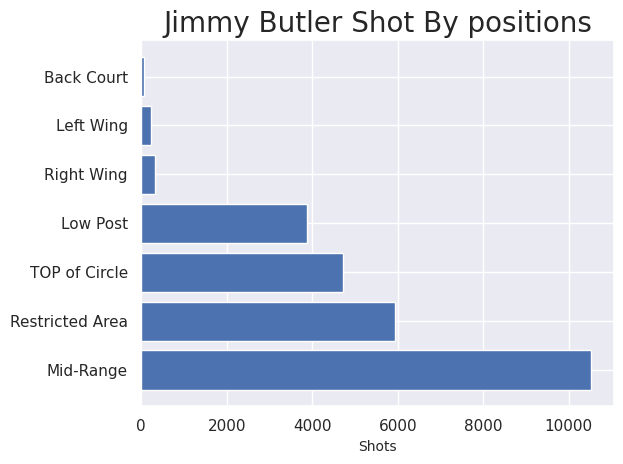

In [ ]:
# Number of shots Jimme Butler made from all positions
area = jb['shot_zone_basic'].value_counts()
b = np.array([0,1,2,3,4,5,6])
plt.barh(b,area,align ='center')
plt.yticks(b,('Mid-Range','Restricted Area','TOP of Circle','Low Post','Right Wing','Left Wing','Back Court'))
plt.xlabel('Shots',fontsize=10)
plt.title('Jimmy Butler Shot By positions',fontsize=20)
plt.tight_layout()#
plt.show()

He's very confident with mid-range jump shots

Text(0.5, 1.0, 'JB Field Goal Percentage')

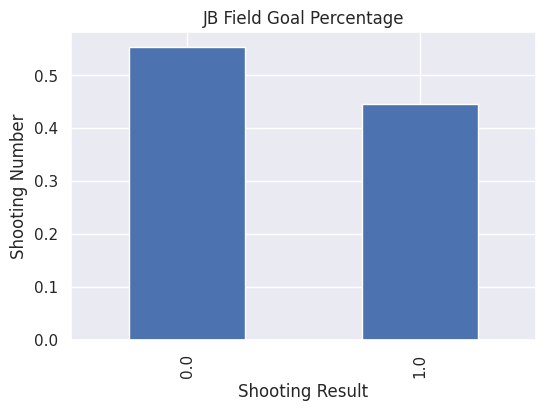

In [ ]:
#Bivariate analysis
plt.figure(figsize = (6,4))
jb['shot_made_flag'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('Shooting Result')
plt.ylabel('Shooting Number')
plt.title('JB Field Goal Percentage')

Jimmy Butler shot about 43 percent from the field, as well as most All-stars in the NBA

<Axes: xlabel='combined_shot_type', ylabel='shot_made_flag'>

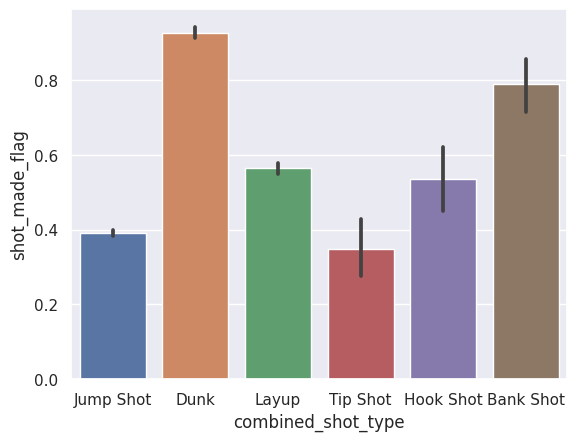

In [ ]:
#Observe the relationship between different shot types and hit rate
sns.barplot(data = jb,x = 'combined_shot_type',y = 'shot_made_flag')

Dunk>Bank Shot>Layup>Hook Shot>Jump Shot>Tip Shot

<Axes: xlabel='shot_type', ylabel='shot_made_flag'>

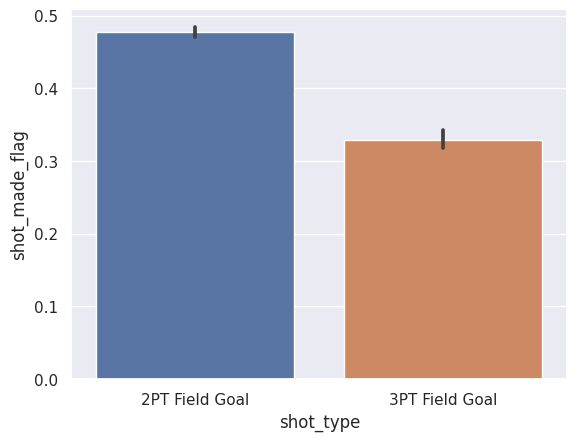

In [ ]:
#Look at the percentages of 2pt and 3pt shots
sns.barplot(data = jb,x = 'shot_type',y = 'shot_made_flag')

2PT > 3PT

<Axes: xlabel='shot_distance', ylabel='shot_made_flag'>

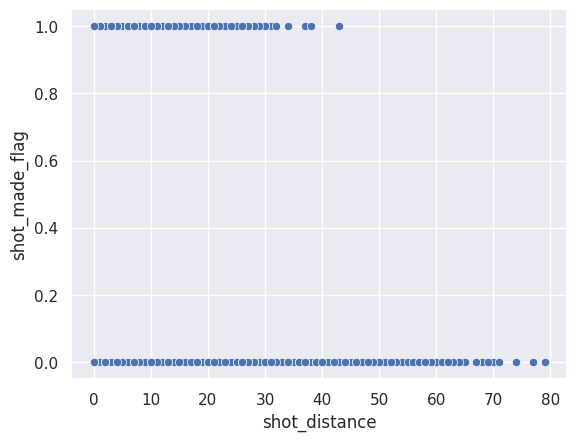

In [ ]:
#Observe the relationship between Shot Range and Hit Rate
sns.scatterplot(data = jb, x = 'shot_distance',y = 'shot_made_flag' )

<Axes: xlabel='shot_made_flag', ylabel='shot_distance'>

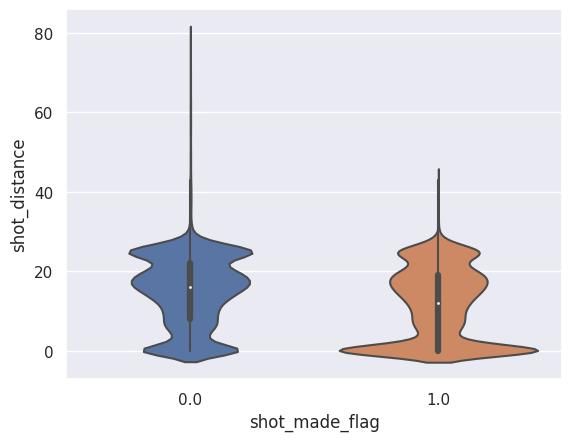

In [ ]:
sns.violinplot(data = jb, y = 'shot_distance',x = 'shot_made_flag' )

Prediction

In [ ]:
jb1 = pd.read_csv("Butler_data.csv")
jb1.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [ ]:
jb1.shape

(30697, 25)

In [ ]:
jb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

There are 25 features in the dataset, 24 of which are complete, and only the feature shot_made_flag has missing values. So next, we will divide the data set into two parts, the data set containing shot_made_flag is used as the training set, and the data set containing shot_made_flag is used as the test set. By modeling the training set, the shot_made_flag value on the test set is predicted.

In [ ]:
jb1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
action_type,30697,57,Jump Shot,18880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined_shot_type,30697,6,Jump Shot,23485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_event_id,30697.0,NaN,NaN,NaN,249.1908,150.003712,2.0,110.0,253.0,368.0,659.0
game_id,30697.0,NaN,NaN,NaN,24764065.868065,7755174.890198,20000012.0,20500077.0,20900354.0,29600474.0,49900088.0
lat,30697.0,NaN,NaN,NaN,33.953192,0.087791,33.2533,33.8843,33.9703,34.0403,34.0883
loc_x,30697.0,NaN,NaN,NaN,7.110499,110.124578,-250.0,-68.0,0.0,95.0,248.0
loc_y,30697.0,NaN,NaN,NaN,91.107535,87.791361,-44.0,4.0,74.0,160.0,791.0
lon,30697.0,NaN,NaN,NaN,-118.26269,0.110125,-118.5198,-118.3378,-118.2698,-118.1748,-118.0218
minutes_remaining,30697.0,NaN,NaN,NaN,4.885624,3.449897,0.0,2.0,5.0,8.0,11.0
period,30697.0,NaN,NaN,NaN,2.519432,1.153665,1.0,1.0,3.0,3.0,7.0


In [ ]:
#Delete id features that have no impact on the prediction result

drop_ids = ['game_event_id','game_id','team_id','shot_id']
for feature in drop_ids:
    jb1 = jb1.drop(feature,axis = 1)

In [ ]:
# Create a new feature time_remaining to replace minutes_remaining and seconds_remaining
jb1['time_remaining'] = jb1['minutes_remaining']*60 + jb1['seconds_remaining']

In [ ]:
# Delete the minutes_remaining and seconds_remaining features
jb1 = jb1.drop(['minutes_remaining','seconds_remaining'],axis = 1)

In [ ]:
jb1['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [ ]:
#Process the season data into a simpler format
jb1['season'] = jb1['season'].apply(lambda x:int(x.split('-')[1]))
jb1['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0])

In [ ]:
#lat,lon,loc_x,loc_y express the same meaning, delete the lat,lon features
jb1 = jb1.drop(['lat','lon'],axis = 1)

#action_type and combined_shot_type have similar meanings. Delete action_type
jb1 = jb1.drop(['action_type'],axis = 1)

#shot_zone_area,shot_zone_basic, and shot_zone_range express the same meaning
jb1 = jb1.drop(['shot_zone_basic','shot_zone_range'],axis = 1)

#team_name and game_date also have no effect on the final prediction. Delete these two features
jb1 = jb1.drop(['team_name','game_date'],axis = 1)


jb1 = jb1.drop('matchup',axis = 1)

In [ ]:
jb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combined_shot_type  30697 non-null  object 
 1   loc_x               30697 non-null  int64  
 2   loc_y               30697 non-null  int64  
 3   period              30697 non-null  int64  
 4   playoffs            30697 non-null  int64  
 5   season              30697 non-null  int64  
 6   shot_distance       30697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           30697 non-null  object 
 9   shot_zone_area      30697 non-null  object 
 10  opponent            30697 non-null  object 
 11  time_remaining      30697 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.8+ MB


Where combined_shot_type,shot_type,shot_zone_area,opponent is of type object, and one_hot_enncoding is required for these characteristics.

In [ ]:
jb1 = pd.get_dummies(jb1)
jb1.head()

,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,time_remaining,combined_shot_type_Bank Shot,combined_shot_type_Dunk,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,167,72,1,0,1,18,NaN,627,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-157,0,1,0,1,15,0.0,622,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-101,135,1,0,1,16,1.0,465,0,0,...,0,0,1,0,0,0,0,0,0,0
3,138,175,1,0,1,22,0.0,412,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2,0,1,0,1.0,379,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
jb1.shape

(30697, 55)

In [ ]:
# Divide the data set into a training set and a test set
train_data = jb1[pd.notnull(jb1['shot_made_flag'])]
test_data = jb1[pd.isnull(jb1['shot_made_flag'])]

print('train data:',train_data.shape)
print('test data:',test_data.shape)

train data: (25697, 55)
test data: (5000, 55)


Since the test set has no label, we need to divide the training set into training samples and verification samples through cross-validation, and use the verification set to evaluate the quality of the model. Finally, the best model is selected to predict the test sample.

In [ ]:
# Prepare the data, divide the training data into characteristic tags,
# and delete the shot_made_flag column in the test data

train_labels = train_data['shot_made_flag']
train_features = train_data.drop('shot_made_flag',axis = 1)

test_features = test_data.drop('shot_made_flag',axis = 1)

In [ ]:
#Initialize a Random Forest Model
RFC = RandomForestClassifier()
# Use gridsearch gridsearchcv to find the best model parameters
param_grid = {'n_estimators':[40,80,120,160,200],
             'max_depth':[3,4,5,6,7,8,9,10],
             'min_samples_split':[3,4,5,6,7]}
grid = GridSearchCV(RFC,param_grid = param_grid,cv = 5,verbose = 2,n_jobs = -1)
t1 = time.time()
grid.fit(train_features,train_labels)
t2 = time.time()
print('model trainning time{}'.format(t2 - t1))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
model trainning time1426.3192918300629


In [ ]:
# Print the best model parameters
grid.best_params_

{'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 40}

In [ ]:
best_model = grid.best_estimator_
test_flag = best_model.predict(test_features)
print(test_flag[:10])

[0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]


In [ ]:
test_data['shot_made_flag'] = test_flag

<ipython-input-58-67cf477ffddc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['shot_made_flag'] = test_flag


In [ ]:
test_data.head(10)
#test_data.to_csv('jb_prediction.csv')

,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,time_remaining,combined_shot_type_Bank Shot,combined_shot_type_Dunk,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,167,72,1,0,1,18,0.0,627,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1,28,3,0,1,2,0.0,485,0,0,...,0,0,1,0,0,0,0,0,0,0
16,0,0,1,0,1,0,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
19,0,0,3,0,1,0,1.0,646,0,0,...,0,0,0,0,0,0,0,1,0,0
32,163,76,1,0,1,17,0.0,686,0,0,...,0,0,0,0,0,0,0,0,1,0
33,70,194,1,0,1,20,0.0,658,0,0,...,0,0,0,0,0,0,0,0,1,0
34,1,19,1,0,1,1,1.0,453,0,0,...,0,0,0,0,0,0,0,0,1,0
35,-12,15,1,0,1,1,1.0,358,0,0,...,0,0,0,0,0,0,0,0,1,0
36,1,4,1,0,1,0,1.0,249,0,0,...,0,0,0,0,0,0,0,0,1,0
37,-117,116,2,0,1,16,0.0,333,0,0,...,0,0,0,0,0,0,0,0,1,0
